### Interactive Data Visualisation

In [1]:
import os
import pandas as pd
from ipywidgets import widgets
import plotly.graph_objects as go

In [2]:
project_dir = os.getcwd().split('\\')[:-1]
project_dir = '\\'.join(project_dir)
processed_dir = project_dir + '\\data\\processed'
processed_files = os.listdir(processed_dir)
processed_files = [file for file in processed_files if not file.startswith('predicted')]
window_sizes = [int(file.split('_')[1]) for file in processed_files if file.endswith('.hdf')]
window_sizes = list(set(window_sizes))
step_sizes = [int(file.split('_')[3][:-4]) for file in processed_files if file.endswith('.hdf')]
step_sizes = list(set(step_sizes))
df = pd.read_hdf(f'{processed_dir}\\window_180_step_180.hdf')
cols = df.columns

In [3]:
windows = {window: [step for step in step_sizes if step<=window]for window in window_sizes}

In [4]:
window = widgets.Select(
    options=windows.keys(),
    description='Window Size:',
    disabled=False)

step = widgets.Select(
    options=windows[window.value],
    value=windows[window.value][0],
    description='Step Size:',
    disabled=False)

x_ax = widgets.Dropdown(
    description='X-axis:',
    value='window',
    options=cols)

y_ax = widgets.Dropdown(
    description='Y-axis:',
    value='mean_offset',
    options=cols)


# Assign an empty figure widget with two traces
trace1 = go.Scatter(x=df['window'], y=df['mean_offset'], mode='markers')

g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        width=700, height=700,
                        title=dict(
                            text='Exploratory Data Analysis'
                        ),
                    ))

In [33]:
tab_cols = ['pp', 'window', 'mean_offset']

def validate():
    if x_ax.value in cols and y_ax.value in cols:
        return True
    else:
        return False
    
def response(change):
    step.options = windows[window.value]
    if step.value not in windows[window.value]:
        step.value=windows[window.value][0]
    if validate():
        df = pd.read_hdf(f'{processed_dir}\\window_{window.value}_step_{step.value}.hdf')
        cols = df.columns
        x = df[x_ax.value]
        y = df[y_ax.value]
        tab_cols = ['pp', x_ax.value, y_ax.value]
        with g.batch_update():
            g.data[0].x = x
            g.data[0].y = y
            g.layout.xaxis.title = x_ax.value
            g.layout.yaxis.title = y_ax.value
            t.data[0].header.values = tab_cols
            if g.data[0].selectedpoints:
                t.data[0].cells.values = [df.loc[list(g.data[0].selectedpoints)][col] for col in tab_cols]
            
x_ax.observe(response, names="value")
y_ax.observe(response, names="value")
window.observe(response, names="value")
step.observe(response, names="value")

In [34]:
t = go.FigureWidget([go.Table(
    header=dict(values=tab_cols,
               fill={'color':' #C2D4FF'},
               align=['left']*5),
    cells=dict(values=[df[col] for col in tab_cols],
              fill={'color':'#F5F8FF'},
              align=['left'] * 5))])

def selection_func(trace, points, selector):
    t.data[0].cells.values = [df.loc[points.point_inds][col] for col in list(t.data[0].header.values)]
    
g.data[0].on_selection(selection_func)

In [35]:
container1 = widgets.HBox([window, step])
container2 = widgets.HBox([x_ax, y_ax])
graph = widgets.VBox([container1, container2, g])
container3 = widgets.HBox([t])
widgets.HBox([graph, container3])

In [1]:
window = widgets.Select(
    options=windows.keys(),
    description='Window Size:',
    disabled=False)

step = widgets.Select(
    options=windows[window.value],
    value=windows[window.value][0],
    description='Step Size:',
    disabled=False)

x_ax = widgets.Dropdown(
    description='X-axis:',
    value='window',
    options=cols)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['standardised_mean_scl'], opacity=0.75)

g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        width=700, height=700,
                        title=dict(
                            text='Exploratory Data Analysis'
                        ),
                    ))

def validate():
    if x_ax.value in cols and y_ax.value in cols:
        return True
    else:
        return False


def response(change):
    step.options = windows[window.value]
    if step.value not in windows[window.value]:
        step.value=windows[window.value][0]
    if validate():
        df = pd.read_hdf(f'{processed_dir}\\window_{window.value}_step_{step.value}.hdf')
        cols = df.columns
        x = df[x_ax.value]
        with g.batch_update():
            g.data[0].x = x
            g.layout.xaxis.title = x_ax.value
            g.layout.yaxis.title = 'frequency'
            
window.observe(response, names="value")
step.observe(response, names="value")
x_ax.observe(response, names="value")

container1 = widgets.HBox([window, step])
container2 = widgets.HBox([x_ax])
widgets.VBox([container1, container2, g])

NameError: name 'widgets' is not defined

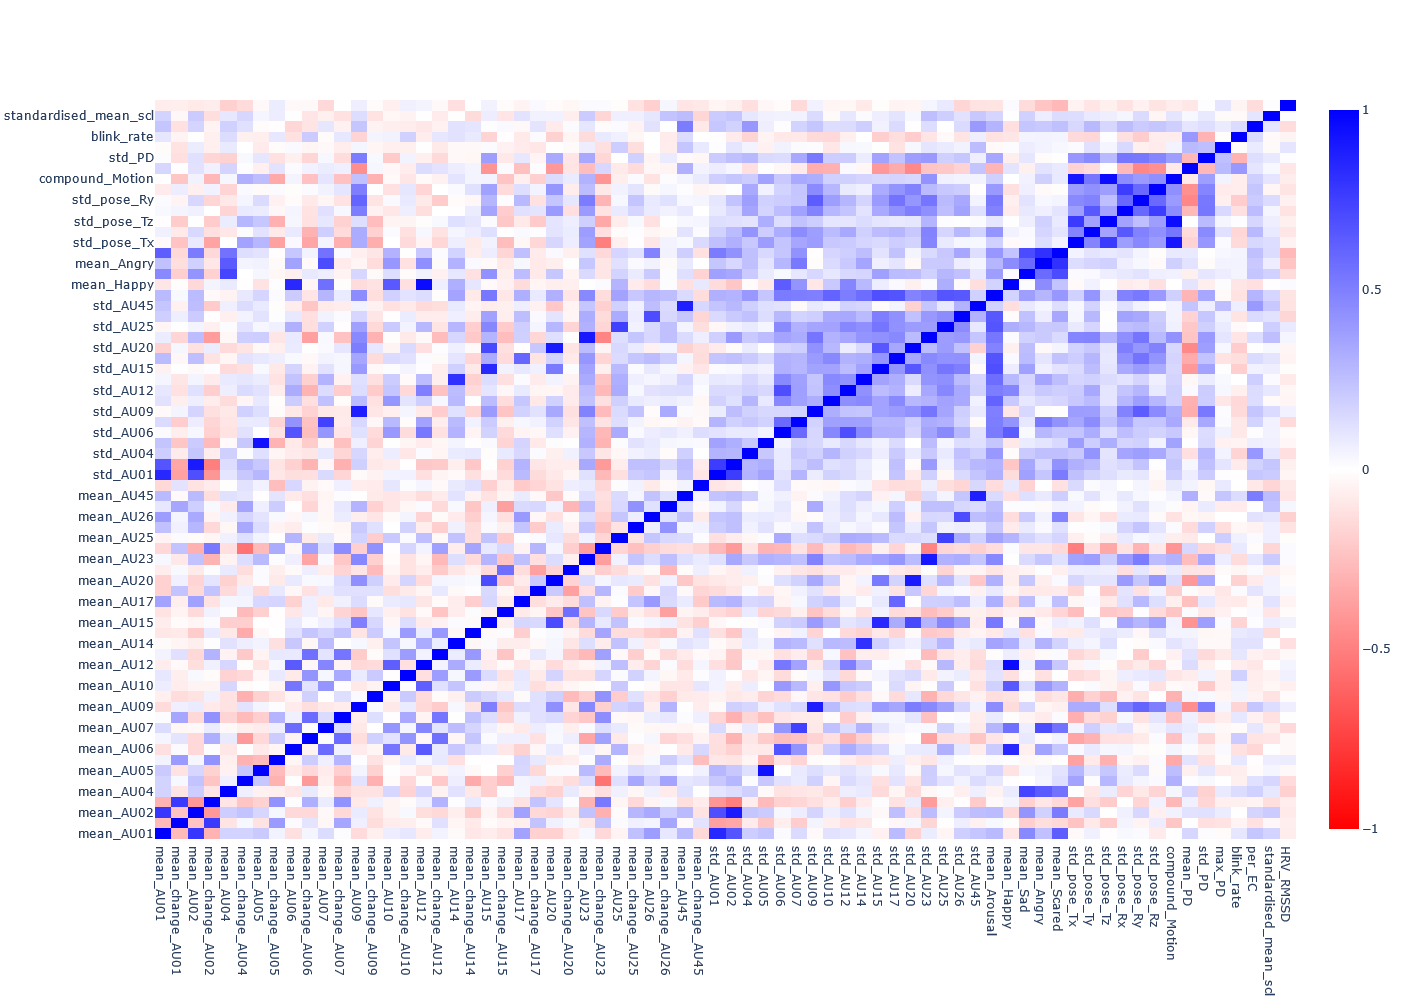

In [39]:
cols = features = ['mean_AU01', 'mean_change_AU01', 'mean_AU02', 'mean_change_AU02', 'mean_AU04',
           'mean_change_AU04', 'mean_AU05', 'mean_change_AU05', 'mean_AU06',
           'mean_change_AU06', 'mean_AU07', 'mean_change_AU07', 'mean_AU09',
           'mean_change_AU09', 'mean_AU10', 'mean_change_AU10', 'mean_AU12',
           'mean_change_AU12', 'mean_AU14', 'mean_change_AU14', 'mean_AU15',
           'mean_change_AU15', 'mean_AU17', 'mean_change_AU17', 'mean_AU20',
           'mean_change_AU20', 'mean_AU23', 'mean_change_AU23', 'mean_AU25',
           'mean_change_AU25', 'mean_AU26', 'mean_change_AU26', 'mean_AU45',
           'mean_change_AU45', 'std_AU01', 'std_AU02', 'std_AU04', 'std_AU05',
           'std_AU06', 'std_AU07', 'std_AU09', 'std_AU10', 'std_AU12', 'std_AU14',
           'std_AU15', 'std_AU17', 'std_AU20', 'std_AU23', 'std_AU25', 'std_AU26',
           'std_AU45', 'mean_Arousal', 'mean_Happy', 'mean_Sad', 'mean_Angry',
           'mean_Scared', 'std_pose_Tx', 'std_pose_Ty', 'std_pose_Tz',
           'std_pose_Rx', 'std_pose_Ry', 'std_pose_Rz', 'compound_Motion',
           'mean_PD', 'std_PD', 'max_PD', 'blink_rate', 'per_EC', 'standardised_mean_scl','HRV_RMSSD']
corr_matrix = df[cols].corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix, x=cols, y=cols, colorscale=['red', 'white', 'blue'], zmin=-1, zmax=1), layout=go.Layout(width=1000, height=1000))
fig.show()